In [155]:
import os
import pandas as pd
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib import pyplot
import matplotlib.dates as mdates

from datetime import datetime, timedelta

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR

In [156]:
#import data
df = pd.read_csv('df_berlin.csv', index_col='date')
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')
df

unemployment_rate  number_of_companies_closed  number_of_start_ups
date                                                                          
2007-05-01               15.9                       248.0                483.0
2007-06-01               15.6                       230.0                632.0
2007-07-01               15.7                       255.0                561.0
2007-08-01               15.5                       319.0                639.0
2007-09-01               14.9                       255.0                438.0
...                       ...                         ...                  ...
2018-08-01                8.2                       457.0                915.0
2018-09-01                7.9                       444.0                754.0
2018-10-01                7.7                       350.0                830.0
2018-11-01                7.6                       332.0                911.0
2018-12-01                7.6                       330.0                708.0

[140 rows x 3 columns]

In [157]:
#for ARIMA modles we don't neet the other variables
df_raw = df
df = df[['unemployment_rate']]

<AxesSubplot:xlabel='date', ylabel='unemployment_rate'>

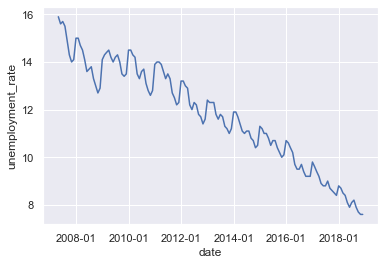

In [158]:
g = sns.lineplot(data=df, x="date", y="unemployment_rate")
g.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
g

- Very seasonal data
- Trend

In [159]:
#train and test slice
pred_from = datetime(2017,1,1)
pred_until = datetime(2018,12,1)

df_train = df[:pred_from - timedelta(days=1)]
df_test = df[pred_from:]

# AR model

In [160]:
model = ARIMA(df_train, order=(4,0,0))
model_fit = model.fit()

pred = model_fit.predict(start=pred_from, end=pred_until)
df_test['pred'] = pred

sqrt(mean_squared_error(df_test['unemployment_rate'], df_test['pred']))

/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1.258637563752262

<AxesSubplot:xlabel='date'>

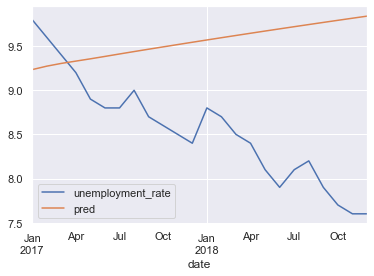

In [161]:
df_test.plot()

# MA model

In [162]:
model = ARIMA(df_train, order=(0,0,1))
model_fit = model.fit()

pred = model_fit.predict(start=pred_from, end=pred_until)
df_test['pred'] = pred

sqrt(mean_squared_error(df_test['unemployment_rate'], df_test['pred']))

/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/amitsasson/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

3.916126687759523

<AxesSubplot:xlabel='date'>

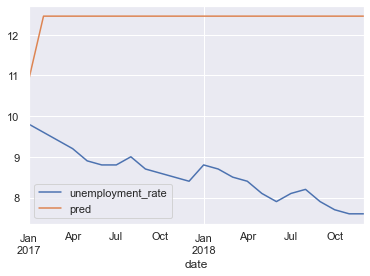

In [163]:
df_test.plot()

# ARMA model

In [164]:
model = ARIMA(df_train, order=(2,0,1))
model_fit = model.fit()

pred = model_fit.predict(start=pred_from, end=pred_until)
df_test['pred'] = pred

sqrt(mean_squared_error(df_test['unemployment_rate'], df_test['pred']))

/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1.5668577129437127

<AxesSubplot:xlabel='date'>

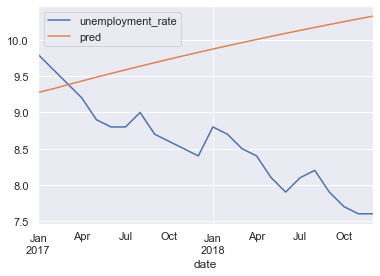

In [165]:
df_test.plot()

# ARIMA model 

In [166]:
model = ARIMA(df_train, order=(2,2,1))
model_fit = model.fit()

pred = model_fit.predict(start=pred_from, end=pred_until)
df_test['pred'] = pred

sqrt(mean_squared_error(df_test['unemployment_rate'], df_test['pred']))

/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0.2559053132212563

<AxesSubplot:xlabel='date'>

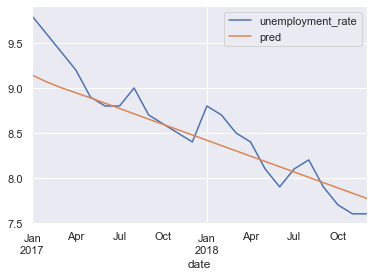

In [167]:
df_test.plot()

# SARIMA model 

In [168]:
model = SARIMAX(df_train, order=(2, 2, 1), seasonal_order=(1, 0, 1,12))
model_fit = model.fit()
pred = model_fit.predict(start=pred_from, end=pred_until)
df_test['pred'] = pred
sqrt(mean_squared_error(df_test['unemployment_rate'], pred))

/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/amitsasson/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

0.25881639015721575

<AxesSubplot:xlabel='date'>

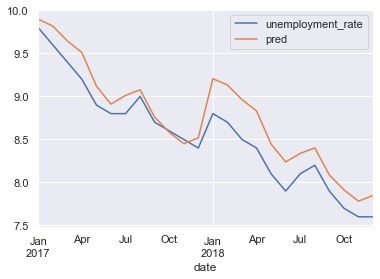

In [169]:
df_test.plot()

# VAR model

In [170]:
df = df_raw

#train and test slice
pred_from = datetime(2017,1,1)
pred_until = datetime(2018,12,1)

df_train = df[:pred_from - timedelta(days=1)]
df_test = df[pred_from:]

In [171]:
model = VAR(df_train)
model_fitted = model.fit(10)

lagged_values = df_train.values[-10:]
pred = model_fitted.forecast(y=lagged_values, steps= 24) 
pred = pd.DataFrame(pred, index = df_test.index , columns=df_test.columns + '_pred')

/Users/amitsasson/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [172]:
df = pd.merge(df, pred, left_index=True, right_index=True)
df

unemployment_rate  number_of_companies_closed  \
date                                                        
2017-01-01                9.8                       436.0   
2017-02-01                9.6                       323.0   
2017-03-01                9.4                       390.0   
2017-04-01                9.2                       333.0   
2017-05-01                8.9                       404.0   
2017-06-01                8.8                       289.0   
2017-07-01                8.8                       413.0   
2017-08-01                9.0                       531.0   
2017-09-01                8.7                       433.0   
2017-10-01                8.6                       365.0   
2017-11-01                8.5                       386.0   
2017-12-01                8.4                       389.0   
2018-01-01                8.8                       508.0   
2018-02-01                8.7                       401.0   
2018-03-01                8.5                       368.0   
2018-04-01                8.4                       405.0   
2018-05-01                8.1                       363.0   
2018-06-01                7.9                       364.0   
2018-07-01                8.1                       382.0   
2018-08-01                8.2                       457.0   
2018-09-01                7.9                       444.0   
2018-10-01                7.7                       350.0   
2018-11-01                7.6                       332.0   
2018-12-01                7.6                       330.0   

            number_of_start_ups  unemployment_rate_pred  \
date                                                      
2017-01-01                839.0                9.634027   
2017-02-01                986.0                9.535913   
2017-03-01               1038.0                9.471457   
2017-04-01                623.0                9.447167   
2017-05-01                912.0                9.147098   
2017-06-01                621.0                9.110142   
2017-07-01                845.0                9.263903   
2017-08-01                675.0                9.251225   
2017-09-01                777.0                8.942483   
2017-10-01                790.0                8.878273   
2017-11-01                894.0                8.785675   
2017-12-01                722.0                8.659880   
2018-01-01                810.0                8.895124   
2018-02-01                804.0                8.916307   
2018-03-01               1052.0                8.777580   
2018-04-01                955.0                8.721399   
2018-05-01                854.0                8.612299   
2018-06-01                942.0                8.537576   
2018-07-01                825.0                8.607774   
2018-08-01                915.0                8.586842   
2018-09-01                754.0                8.368928   
2018-10-01                830.0                8.280454   
2018-11-01                911.0                8.183904   
2018-12-01                708.0                8.084212   

            number_of_companies_closed_pred  number_of_start_ups_pred  
date                                                                   
2017-01-01                       380.063437                853.461958  
2017-02-01                       406.176206                930.736615  
2017-03-01                       370.245422                826.844922  
2017-04-01                       385.447322                865.273279  
2017-05-01                       391.100582                890.959627  
2017-06-01                       361.839021                875.936575  
2017-07-01                       386.940187                876.356340  
2017-08-01                       423.373686                872.552488  
2017-09-01                       405.477522                862.555919  
2017-10-01                       382.769820                871.415980  
2017-11-01                

<AxesSubplot:xlabel='date'>

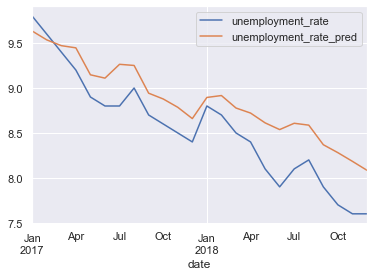

In [173]:
df[['unemployment_rate','unemployment_rate_pred']].plot()

In [174]:
sqrt(mean_squared_error(df['unemployment_rate'], df['unemployment_rate_pred']))

0.3687616435130438

<AxesSubplot:xlabel='date'>

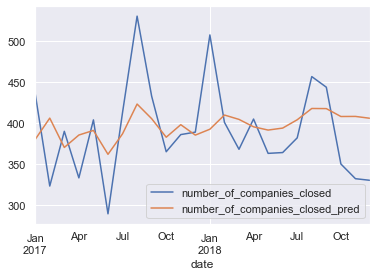

In [175]:
df[['number_of_companies_closed','number_of_companies_closed_pred']].plot()